<a href="https://colab.research.google.com/github/ToyTeX/NumericalNotebooks/blob/main/ImageCompression3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
from google.colab import files
files.upload()

Saving rowdy_thumbs_up_gray.jpg to rowdy_thumbs_up_gray.jpg


{'rowdy_thumbs_up_gray.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xc0\x00\x0b\x08\x03u\x04\xb0\x01\x01\x11\x00\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8

['.config', 'rowdy_thumbs_up_gray.jpg', 'sample_data']


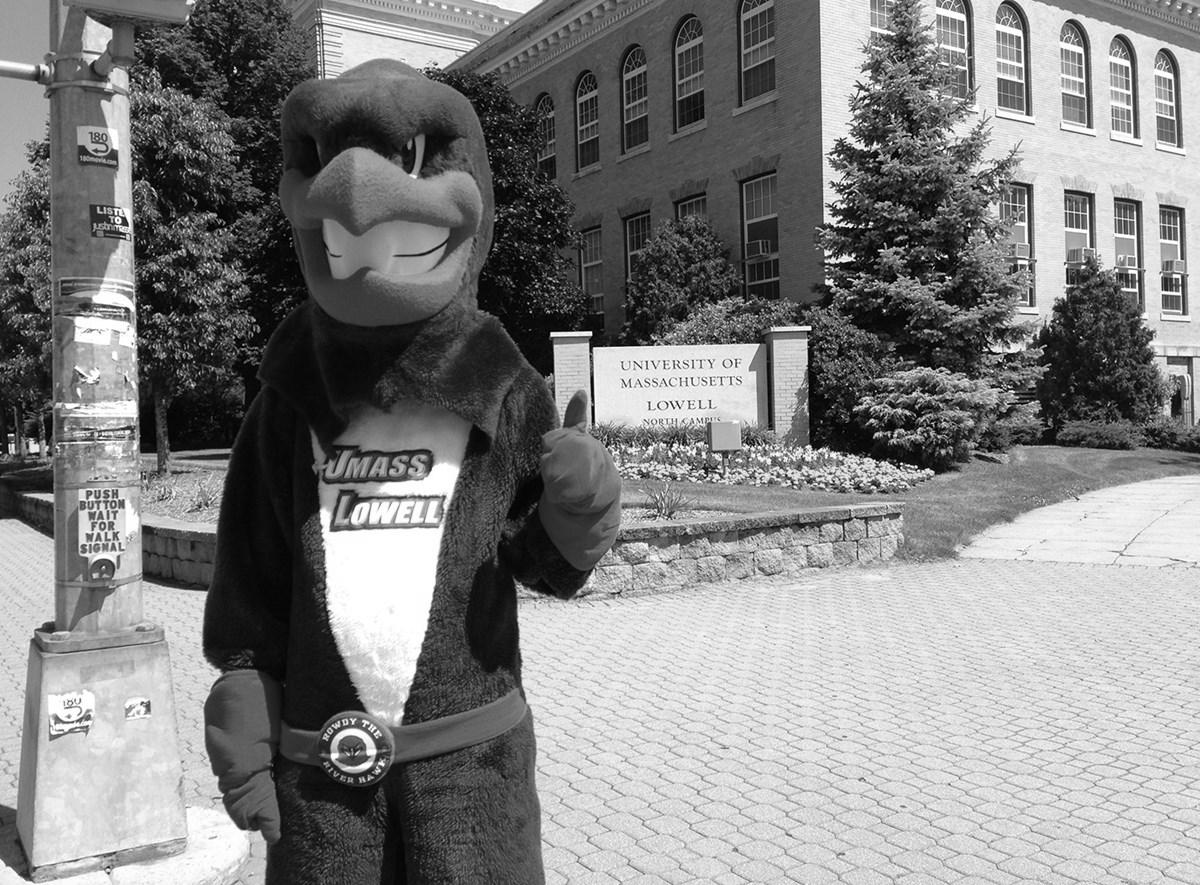

Image size: 209.0498046875 KB


In [ ]:
import os
print(os.listdir())

from IPython.display import Image, display
import os

# Define the path to the directory containing the images
image_dir = "." # Set image_dir to the current directory

# Define the filename of the image
image_filename = "rowdy_thumbs_up_gray.jpg"

# Define the full path to the image
image_path = os.path.join(image_dir, image_filename)


# Show the image
display(Image(filename=image_path))
print("Image size:", os.path.getsize(image_path)/1024, "KB")

In [ ]:
# Read the grayscale image
img = cv2.imread('rowdy_thumbs_up_gray.jpg', cv2.IMREAD_GRAYSCALE)

#SVD channel
def svd_compress_channel(channel, k):
    U, S, VT = np.linalg.svd(channel, full_matrices=False)
    S_k = np.zeros((k, k))
    np.fill_diagonal(S_k, S[:k])
    compressed = U[:, :k] @ S_k @ VT[:k, :]
    compressed = np.clip(compressed, 0, 255)
    return compressed.astype(np.uint8)



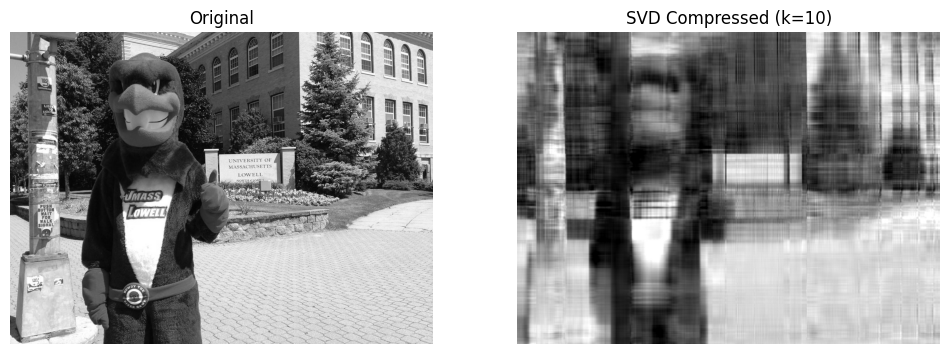

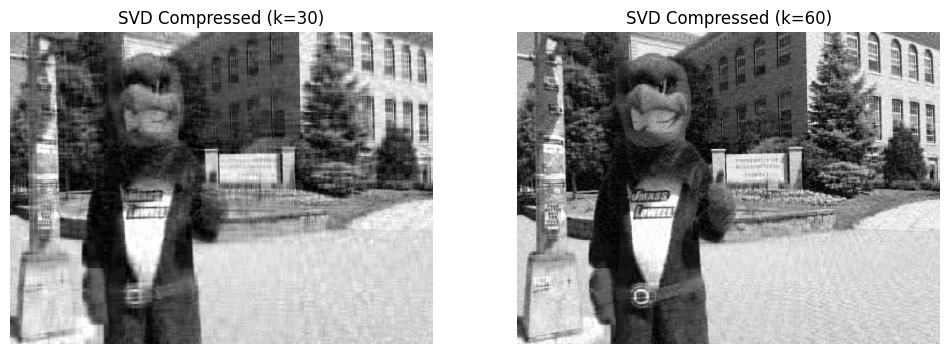

In [ ]:
k = 10  # Adjust k for more/less compression

compressed_img = svd_compress_channel(img, k)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title(f"SVD Compressed (k={k})")
plt.imshow(compressed_img, cmap='gray')
plt.axis('off')
plt.show()


k = 30  # Adjust k

compressed_img_k30 = svd_compress_channel(img, k)

k = 60  # Adjust k
compressed_img_k60 = svd_compress_channel(img, k)


plt.figure(figsize=(12, 12))


plt.subplot(2, 2, 1)
plt.title(f"SVD Compressed (k=30)")
plt.imshow(compressed_img_k30, cmap='gray')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.title(f"SVD Compressed (k=60)")
plt.imshow(compressed_img_k60, cmap='gray')
plt.axis('off')

plt.show()
